#Data loading and Preparation

In [ ]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
#Loading data
path = '/content/4A_cleaned_8_.xlsx'
data =pd.read_excel(path)
data.head(2)

,IP NUMBER,UNIT,SEX,AGE,MARITAL STATUS,RELIGION,DISTRICT OF RESIDENCE,REGION,WORKING DIAGNOSIS,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,TB_type,NUMBER OF PREVIOUS ADMISSIONS,DAY OF ADMISSION,MONTH OF ADMISSION,YEAR OF ADMISSION,DURATION,OUT COME
0,1861416,GI,M,30,2,COU,Nakasongola,CENTRAL,"ISS,Abdominal TB,,","ISS,,",1,Abdominal_TB,5,Tuesday,November,2010,6,IMPROVED
1,1868011,GI,F,46,2,COU,Kampala,CENTRAL,"ISS Stage I&II,Disseminated TB,,","ISS Stage I&II,,",1,Disseminated TB,3,Monday,December,2010,4,IMPROVED


In [ ]:
data['TB_type'].unique()

array(['Abdominal_TB', 'Disseminated TB', 'PTB', 'Other TBs', 'CNS_TB',
       'TB iris'], dtype=object)

##**Preparing data**

In [ ]:
data.dropna(subset=['NUMBER OF PREVIOUS ADMISSIONS'], inplace=True)
data.dropna(subset=['IP NUMBER'], inplace=True)

data = data[data['IP NUMBER']  != 'a' ]
data = data[data['IP NUMBER']  != 'vf' ]

In [ ]:
data.shape

(4029, 18)

In [ ]:
#data.to_excel('final_cleaned_TB-4a.xlsx', index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4029 entries, 0 to 4028
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   IP NUMBER                               4029 non-null   object
 1   UNIT                                    4029 non-null   object
 2   SEX                                     4029 non-null   object
 3   AGE                                     4029 non-null   int64 
 4   MARITAL STATUS                          4026 non-null   object
 5   RELIGION                                4029 non-null   object
 6   DISTRICT OF RESIDENCE                   4029 non-null   object
 7   REGION                                  4029 non-null   object
 8   WORKING DIAGNOSIS                       4029 non-null   object
 9   ADDITIONAL WORKING DIAGNOSIS            3849 non-null   object
 10  NUMBER OF ADDITIONAL WORKING DIAGNOSIS  4029 non-null   int64 
 11  TB_t

In [ ]:
#filtering out only patients with "DIED" outcome
data = data[data['OUT COME'] == 'DIED']

In [ ]:
#Deleting features which are not going to be used
features_to_remove = ['IP NUMBER', 'UNIT','YEAR OF ADMISSION','DISTRICT OF RESIDENCE','WORKING DIAGNOSIS' ,'ADDITIONAL WORKING DIAGNOSIS',
                'MARITAL STATUS']
data = data.drop(columns = features_to_remove)

In [ ]:

non_features = ['OUT COME']
data1 = data.drop(columns=non_features)

#**Data Preprocessing**

##Cleaning and filtering

In [ ]:
#filtering out only patients with "DIED" outcome
data = data[data['OUT COME'] == 'DIED']

In [ ]:
data = data.drop(columns=['OUT COME'])

In [ ]:
import pandas as pd
#Encoding categorical features
non_features = ['DURATION', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS','AGE',
                'NUMBER OF PREVIOUS ADMISSIONS']
data1 = data.drop(columns=non_features)
text_columns = data1.select_dtypes(include=['object']).columns
data2 = pd.get_dummies(data, columns=text_columns)

In [ ]:
data2['NUMBER OF PREVIOUS ADMISSIONS'].unique()

array([ 2,  4,  5,  1,  7,  6,  9, 20, 11, 13,  3,  8, 15, 14, 10, 18, 16,
       22, 21, 25, 12, 26, 23, 92,  0])

In [ ]:
data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'] = data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'].astype(float)
data2['AGE'] = data2['AGE'].astype(float)

In [ ]:
data2.sample(4)

,AGE,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,NUMBER OF PREVIOUS ADMISSIONS,DURATION,SEX_F,SEX_M,RELIGION_CATHOLIC,RELIGION_COU,RELIGION_ISLAM,RELIGION_OTHERS,...,MONTH OF ADMISSION_December,MONTH OF ADMISSION_February,MONTH OF ADMISSION_January,MONTH OF ADMISSION_July,MONTH OF ADMISSION_June,MONTH OF ADMISSION_March,MONTH OF ADMISSION_May,MONTH OF ADMISSION_November,MONTH OF ADMISSION_October,MONTH OF ADMISSION_September
808,29.0,2.0,8,9,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1159,43.0,2.0,0,2,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2069,30.0,1.0,0,2,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
151,28.0,4.0,5,6,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 5 to 4025
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   AGE                                     1289 non-null   float64
 1   NUMBER OF ADDITIONAL WORKING DIAGNOSIS  1289 non-null   float64
 2   NUMBER OF PREVIOUS ADMISSIONS           1289 non-null   int64  
 3   DURATION                                1289 non-null   int64  
 4   SEX_F                                   1289 non-null   uint8  
 5   SEX_M                                   1289 non-null   uint8  
 6   RELIGION_CATHOLIC                       1289 non-null   uint8  
 7   RELIGION_COU                            1289 non-null   uint8  
 8   RELIGION_ISLAM                          1289 non-null   uint8  
 9   RELIGION_OTHERS                         1289 non-null   uint8  
 10  RELIGION_PENTECOSTAL                    1289 non-null   uint

AGE
Skewness of: 0.9496632846993347


<ipython-input-19-295a527e9a52>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


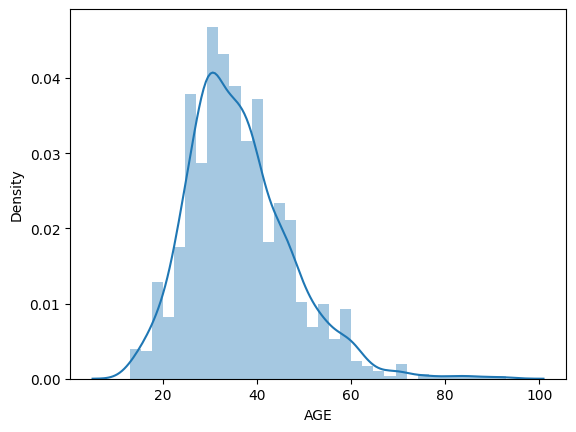

NUMBER OF PREVIOUS ADMISSIONS
Skewness of: 9.753179046520078


<ipython-input-19-295a527e9a52>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


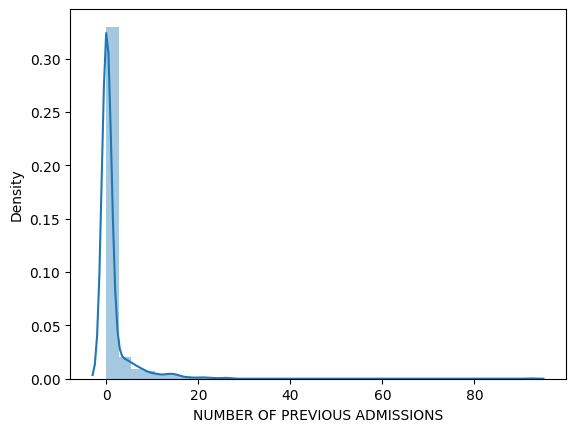

NUMBER OF ADDITIONAL WORKING DIAGNOSIS
Skewness of: 0.4788406731096686


<ipython-input-19-295a527e9a52>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


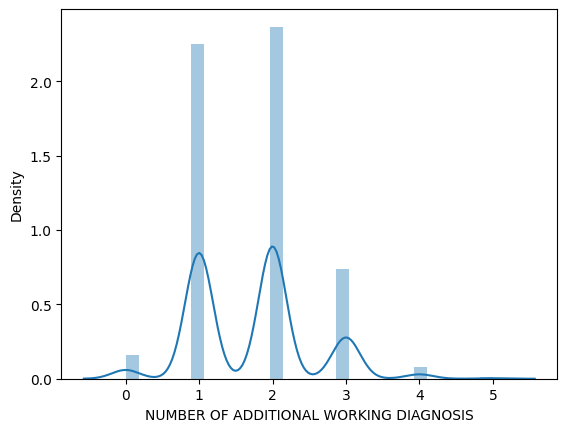

DURATION
Skewness of: 1.4126507630182499


<ipython-input-19-295a527e9a52>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


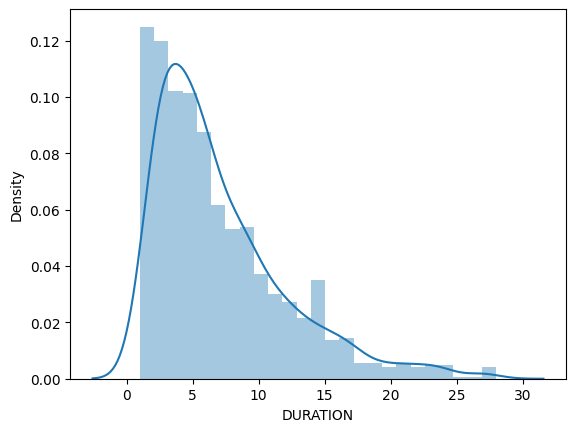

In [ ]:
from scipy.stats import skew
import seaborn as sns

#Visualizing skeness of the continuous features
continuous_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS','DURATION']
for col in continuous_features:
  print(col)
  print(f"Skewness of: {skew(data2[col])}")

  plt.figure()
  sns.distplot(data2[col])
  plt.show()

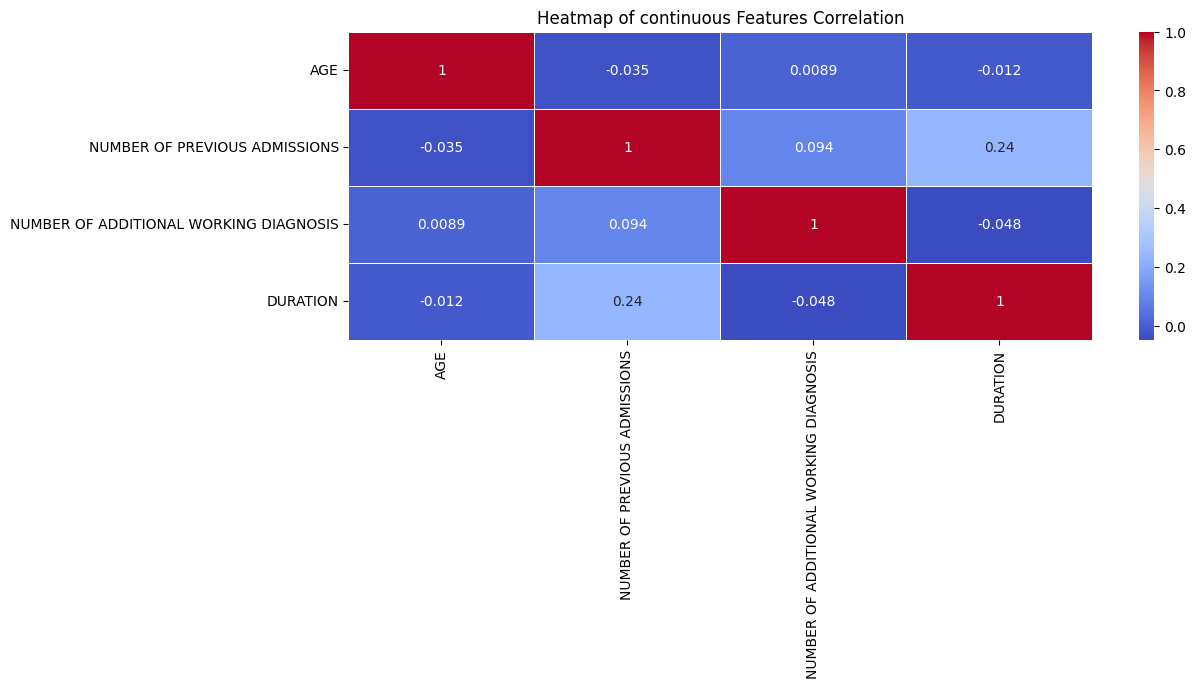

In [ ]:
#Visualizing Correlation among the continuous features nluding the target
continuous_features_target = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'DURATION']
plt.figure(figsize=(12,4))
sns.heatmap(data2[continuous_features_target].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of continuous Features Correlation')
plt.show()

##Normalization and Visualization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Normalizing continuous features
normalise_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS',
                      'NUMBER OF ADDITIONAL WORKING DIAGNOSIS']
scaler = MinMaxScaler()
data2[normalise_features] = scaler.fit_transform(data2[normalise_features])


<function matplotlib.pyplot.show(close=None, block=None)>

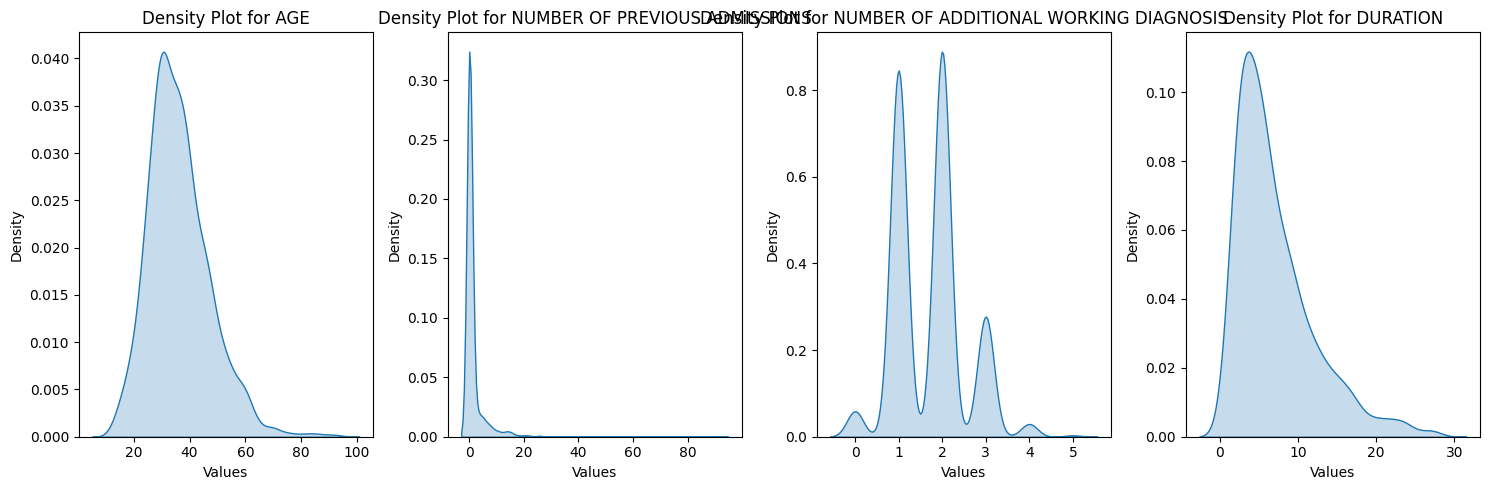

In [ ]:
#Plotting Density plot
import seaborn as sns

continuous_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS','DURATION']

fig, axes = plt.subplots(1, len(continuous_features), figsize=(15, 5))

for i, col in enumerate(continuous_features):
  sns.kdeplot(data[col], fill=True,ax=axes[i])
  axes[i].set_title(f'Density Plot for {col}')
  axes[i].set_xlabel('Values')
  axes[i].set_ylabel('Density')
# plt.figure(figsize=(8,9))
# plt.bar(data['AGE'])
plt.tight_layout()
plt.show

In [ ]:
data2.head(2)

,AGE,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,NUMBER OF PREVIOUS ADMISSIONS,DURATION,SEX_F,SEX_M,RELIGION_CATHOLIC,RELIGION_COU,RELIGION_ISLAM,RELIGION_OTHERS,...,MONTH OF ADMISSION_December,MONTH OF ADMISSION_February,MONTH OF ADMISSION_January,MONTH OF ADMISSION_July,MONTH OF ADMISSION_June,MONTH OF ADMISSION_March,MONTH OF ADMISSION_May,MONTH OF ADMISSION_November,MONTH OF ADMISSION_October,MONTH OF ADMISSION_September
5,0.1375,0.2,0.021739,3,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0.0625,0.4,0.043478,5,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'].unique()

array([0.2, 0.4, 0.6, 1. , 0.8, 0. ])

In [ ]:
data2.shape

(1289, 41)

In [ ]:
#Saving Preprocced data
#data.to_excel('preprocessed1_TB-4a.xlsx', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
#extracting features and targets
X = data2.drop(columns=['DURATION']).values
y = data2['DURATION'].values

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
print(X)

[[0.1375     0.2        0.02173913 ... 0.         0.         0.        ]
 [0.0625     0.4        0.04347826 ... 0.         0.         0.        ]
 [0.3        0.6        0.05434783 ... 0.         0.         0.        ]
 ...
 [0.2375     0.4        0.         ... 0.         0.         0.        ]
 [0.2125     0.4        0.         ... 0.         0.         0.        ]
 [0.3375     0.4        0.         ... 0.         0.         0.        ]]


In [ ]:
print(X.shape)

(1289, 40)


#**Model training**

##Initials

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tabulate import tabulate
tf.random.set_seed(10)
np.random.seed(10)


In [ ]:
# Creating a custom layer to estimate p and q
class PQEstimationLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PQEstimationLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.p = self.add_weight("p", initializer=tf.keras.initializers.Constant(1.0), trainable=True)
        self.q = self.add_weight("q", initializer=tf.keras.initializers.Constant(1.0), trainable=True)

    def call(self, inputs):
        return self.p, self.q

# Creating a function to build your neural network model
def build_model():
    model_input = tf.keras.layers.Input(shape=(40,))
    hidden_layer1 = tf.keras.layers.Dense(units=30, activation='relu')(model_input)
    dropout1 = tf.keras.layers.Dropout(0.9)(hidden_layer1)
    batch_norm1 = tf.keras.layers.BatchNormalization()(dropout1)
    hidden_layer2 = tf.keras.layers.Dense(units=15, activation='relu')(batch_norm1)
    dropout2 = tf.keras.layers.Dropout(0.9)(hidden_layer2)
    batch_norm2 = tf.keras.layers.BatchNormalization()(dropout2)
    hidden_layer3 = tf.keras.layers.Dense(units=3, activation='relu')(batch_norm2)
    dropout3 = tf.keras.layers.Dropout(0.2)(hidden_layer3)
    batch_norm3 = tf.keras.layers.BatchNormalization()(dropout3)
    output = tf.keras.layers.Dense(units=1)(batch_norm3)

    return tf.keras.Model(inputs=model_input, outputs=output)

In [ ]:
# Custom MAE Loss Function
def custom_mae_loss(Y_true, Y_pred):
    return tf.reduce_mean(tf.abs(Y_true - Y_pred))

# Mean Squared Error (MSE) loss
def custom_mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Weibull loss
def weibull_loss(Y_true, Y_pred, p, q):
    weibull_term = Y_true - (-tf.math.log(q) * (1/p) * tf.exp(Y_pred))
    return tf.reduce_mean(weibull_term)

# Loglogistic loss
def loglogistic_loss(Y_true, Y_pred, p, q):
    loglogistic_term = Y_true - (q ** (- 1) - 1) * (1 / p) * tf.exp(Y_pred)
    return tf.reduce_mean(loglogistic_term)


##Loglogistic


Mean loss for fold 4: 60.70296859741211



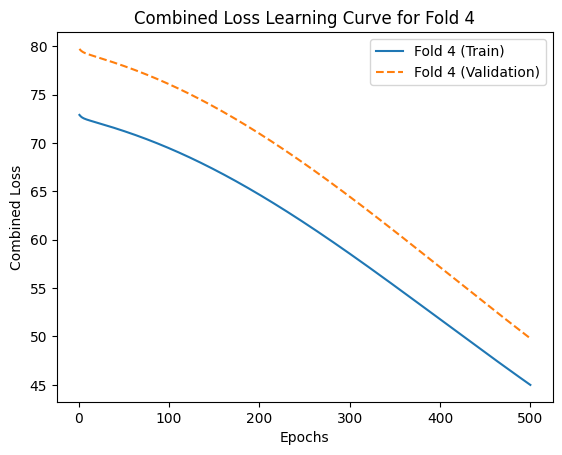


Mean loss for fold 4: 35.987911224365234



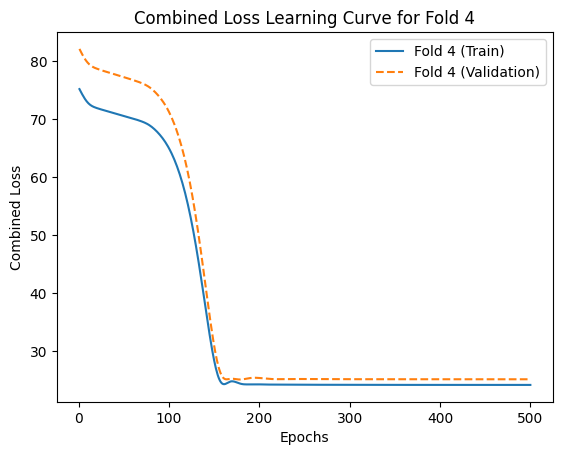


Mean loss for fold 4: 28.24526596069336



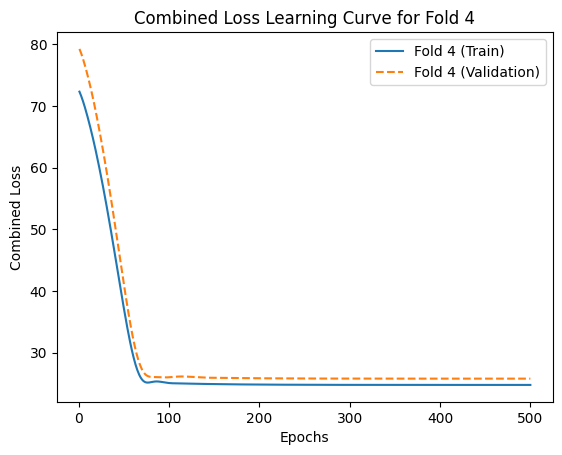


Mean loss for fold 4: 38.39537811279297



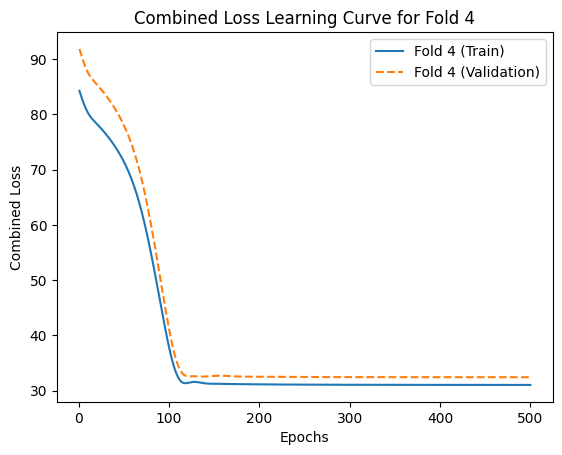


Mean loss for fold 4: 97.52637481689453



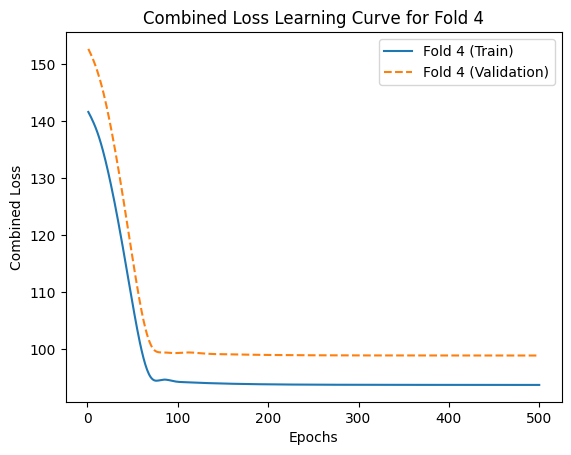


***************************Loglogistic*******************************
Lambda with Lowest Mean Test MAE: 0.01
Mean Test MAE for the Best Lambda: 3.9549200534820557

Mean Test MAE for Each Lambda:
	Lambda 0.001: 4.412661743164063
	Lambda 0.01: 3.9549200534820557
	Lambda 0.1: 4.363104772567749
	Lambda 1: 3.9731280326843263
	Lambda 10: 4.432232093811035



		Table of Test MAEs:
-------------------------------------------------------
                Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
------------  --------  --------  --------  --------  --------
Lambda 0.001   3.98945   3.91904   4.62437   4.57959   4.95086
Lambda 0.01    3.93755   3.87757   3.90498   3.95933   4.09516
Lambda 0.1     3.95393   4.0327    4.67632   4.63894   4.51363
Lambda 1       3.9496    3.9483    3.93965   3.98221   4.04589
Lambda 10      4.11253   4.20014   4.78591   4.58617   4.47641


In [ ]:

fold_losses = [] # List to store loss values for each fold
mean_losses = [] # Store mean loss for each fold
val_losses = [] # Store validation loss for each fold

best_lambda = None # lowest mean MAE for each lambda
lowest_mean_mae_for_lambda = [] # lowest mean MAE for each lambda

lambda_values = [0.001, 0.01, 0.1, 1, 10] # lambda values for hyperparameter tuning
mae_table = np.zeros((len(lambda_values), 5)) # table to store test MAEs for each lambda

# Implementing 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for lambda_index, lambda_value in enumerate(lambda_values):
  fold_maes = []  # Store MAE values for each fold
  for fold_index, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]
    model = build_model()
    pq_layer = PQEstimationLayer()
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    fold_loss = []  # Store loss values for this fold and lambda value
    fold_val_loss = []  # Store validation loss for this fold
    for epoch in range(500):
      with tf.GradientTape(persistent=True) as tape:
          model_output = model(X_train1)
          p, q = pq_layer(X_train1)
          mse_loss = tf.reduce_mean(tf.square(Y_train - model_output))
          loglogistic_term = Y_train - ((q **(- 1) - 1) ** (1/p)) * tf.exp(model_output)
          loglogistic_loss = tf.reduce_mean(loglogistic_term)

          combined_loss = mse_loss + lambda_value * loglogistic_loss

          # Calculating validation loss
          val_output = model(X_test1)
          val_mse_loss = tf.reduce_mean(tf.square(Y_test - val_output))
          val_loglogistic_term = Y_test - ((q ** (- 1) - 1) ** (1/p)) * tf.exp(val_output)
          val_loglogistic_loss = tf.reduce_mean(val_loglogistic_term)
          val_combined_loss = val_mse_loss + lambda_value * val_loglogistic_loss

      gradients = tape.gradient(combined_loss, model.trainable_variables)
      optimizer.apply_gradients(zip(gradients, model.trainable_variables))

      fold_loss.append(combined_loss.numpy())
      fold_val_loss.append(val_combined_loss.numpy())

      # Calculating MAE on the test set for this epoch
      test_output = model(X_test)
      mae = custom_mae_loss(Y_test, test_output)
      fold_maes.append(mae)

    mae_table[lambda_index, fold_index] = np.mean(fold_maes)

    # Calculating the mean loss across all five folds
    mean_loss = np.mean(fold_loss)

  fold_losses.append(fold_loss)  # Store the loss values for this fold
  val_losses.append(fold_val_loss)  # Store validation loss for this fold
  mean_losses.append(mean_loss)  # Store the mean loss for this fold
  print(f"\nMean loss for fold {i}: {mean_loss}\n")

  # Plot the learning curve for this fold (training and validation)
  plt.plot(range(1, len(fold_loss) + 1), fold_loss, label=f"Fold {i} (Train)")
  plt.plot(range(1, len(fold_val_loss) + 1), fold_val_loss, linestyle='dashed',
           label=f"Fold {i} (Validation)")

  plt.xlabel('Epochs')
  plt.ylabel('Combined Loss')
  plt.title(f'Combined Loss Learning Curve for Fold {i}')
  plt.legend()
  plt.show()

  # Calculating the mean loss across all five folds
  mean_loss = np.mean(fold_loss)

  # Calculating the mean MAE for this lambda
  mean_mae_for_lambda = np.mean(mae_table[lambda_index])

  if best_lambda is None or mean_mae_for_lambda < min(lowest_mean_mae_for_lambda):
    best_lambda = lambda_value
  lowest_mean_mae_for_lambda.append(mean_mae_for_lambda)

print('\n***************************Loglogistic*******************************')
# Printing the lambda with the lowest mean MAE
print(f"Lambda with Lowest Mean Test MAE: {best_lambda}")
print(f"Mean Test MAE for the Best Lambda: {min(lowest_mean_mae_for_lambda)}\n")

# Printing the mean MAE for each lambda
print("Mean Test MAE for Each Lambda:")
for i, lambda_value in enumerate(lambda_values):
    print(f"\tLambda {lambda_value}: {lowest_mean_mae_for_lambda[i]}")

print('\n\n')

# Label for lambdas
lambda_labels = [f"Lambda {lambda_value}" for lambda_value in lambda_values]

# Label for folds
fold_labels = [f"Fold {fold_index + 1}" for fold_index in range(5)]

# Printing the table of test MAEs for each lambda and fold with labels
print("\t\tTable of Test MAEs:")
print("-------------------------------------------------------")
table_with_labels = np.column_stack((lambda_labels, mae_table))
print(tabulate(table_with_labels, headers=fold_labels))



##Weibull


Mean loss for fold 4: 0.13678576052188873



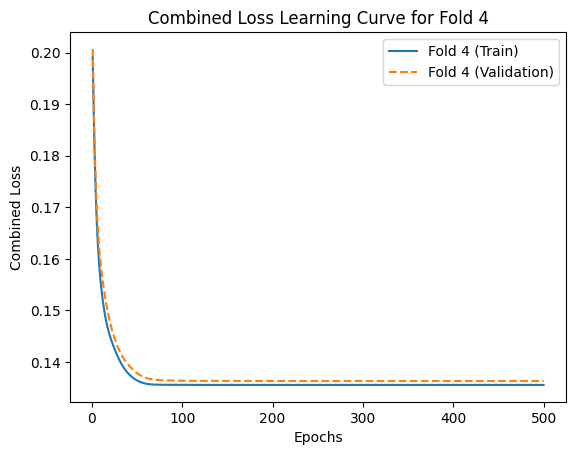


Mean loss for fold 4: 0.19931691884994507



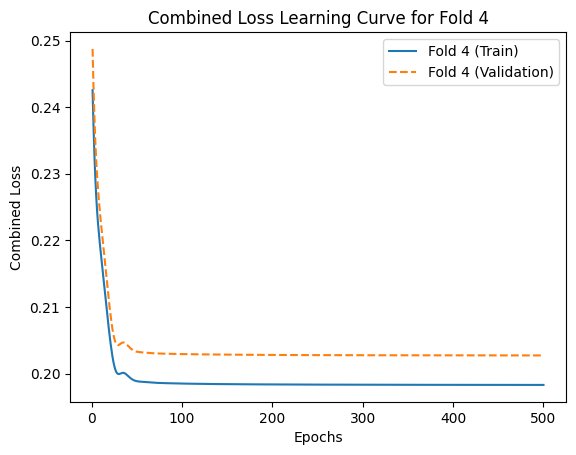


Mean loss for fold 4: 0.8272042274475098



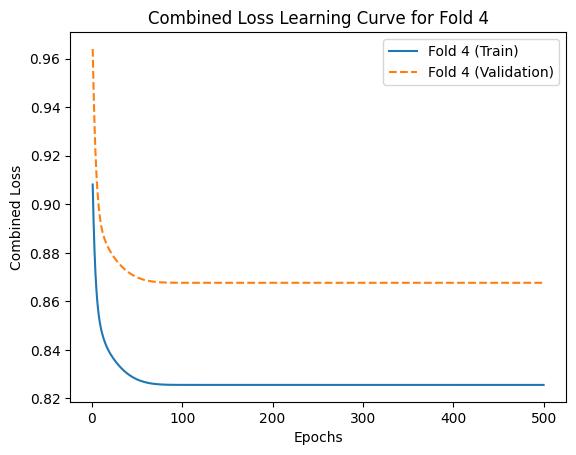


Mean loss for fold 4: 7.098791122436523



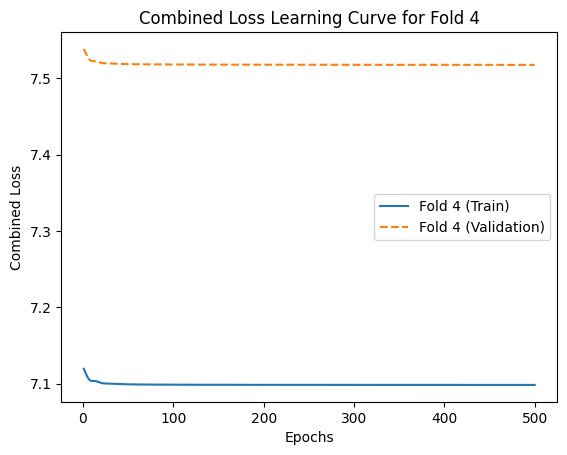


Mean loss for fold 4: 69.82603454589844



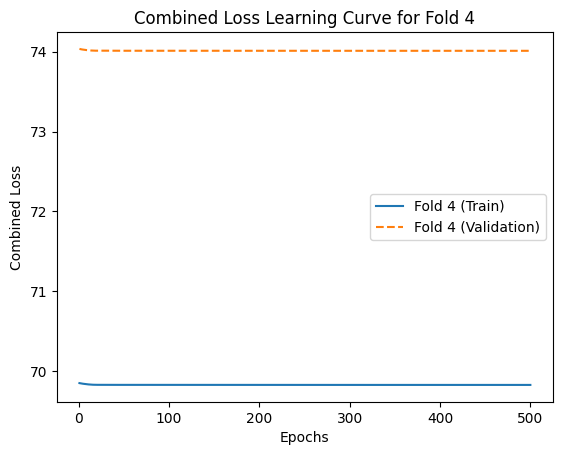


*****************************Weibull**********************************
Lambda with Lowest Mean Test MAE: 1
Mean Test MAE for the Best Lambda: 6.82666425704956
Mean Test MAE for Each Lambda:
Lambda 0.001: 6.833549976348877
Lambda 0.01: 6.827100563049316
Lambda 0.1: 6.833843135833741
Lambda 1: 6.82666425704956
Lambda 10: 6.831326484680176



		Table of Test MAEs:
-------------------------------------------------------
                Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
------------  --------  --------  --------  --------  --------
Lambda 0.001   6.84844   6.7774    6.82906   6.81504   6.8978
Lambda 0.01    6.84082   6.77275   6.82077   6.80861   6.89255
Lambda 0.1     6.85767   6.78101   6.82705   6.80923   6.89425
Lambda 1       6.84075   6.77613   6.82242   6.80515   6.88887
Lambda 10      6.8456    6.77622   6.82825   6.8119    6.89467


In [ ]:

fold_losses = [] # List to store loss values for each fold
mean_losses = [] # Store mean loss for each fold
val_losses = []  # Store validation loss for each fold

mae_table = np.zeros((len(lambda_values), 5)) # table to store test MAEs for each lambda
best_lambda = None # lambda with the lowest mean MAE
lowest_mean_mae_for_lambda = [] # Store the lowest mean MAE for each lambda

lambda_values = [0.001, 0.01, 0.1, 1, 10] # lambda values for hyperparameter tuning

# Implementing 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for lambda_index, lambda_value in enumerate(lambda_values):
  fold_maes = []  # Store MAE values for each fold

  for fold_index, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train2, X_test2 = X_train[train_index], X_train[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]

    model = build_model()
    pq_layer = PQEstimationLayer()
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    fold_loss = []  # Store loss values for this fold and lambda value
    fold_val_loss = []  # Store validation loss for this fold


    for epoch in range(500):
      with tf.GradientTape(persistent=True) as tape:
          model_output2 = model(X_train2)
          p, q = pq_layer(X_train2)

          mse_loss = custom_mse_loss(X_train2, model_output2)
          weibull_loss_train = weibull_loss(Y_train, model_output2,p,q)
          combined_loss = mse_loss + lambda_value * weibull_loss_train

          # Calculating validation loss
          val_output = model(X_test2)
          val_mse_loss = custom_mse_loss(X_test2, val_output)
          val_weibull_loss = weibull_loss(Y_test, val_output, p, q)
          val_combined_loss = val_mse_loss + lambda_value * val_weibull_loss

      gradients = tape.gradient(combined_loss, model.trainable_variables)
      optimizer.apply_gradients(zip(gradients, model.trainable_variables))

      fold_loss.append(combined_loss.numpy())
      fold_val_loss.append(val_combined_loss.numpy())

      # Calculating MAE on the test set for this epoch
      test_output = model(X_test)
      mae = custom_mae_loss(Y_test, test_output)
      fold_maes.append(mae)

    mae_table[lambda_index, fold_index] = np.mean(fold_maes)

    # Calculating the mean loss across all five folds
    mean_loss = np.mean(fold_loss)

  fold_losses.append(fold_loss)  # Store the loss values for this fold
  val_losses.append(fold_val_loss)  # Store validation loss for this fold
  mean_losses.append(mean_loss)  # Store the mean loss for this fold
  print(f"\nMean loss for fold {i}: {mean_loss}\n")

  # Plot the learning curve for this fold (training and validation)
  plt.plot(range(1, len(fold_loss) + 1), fold_loss, label=f"Fold {i} (Train)")
  plt.plot(range(1, len(fold_val_loss) + 1), fold_val_loss, linestyle='dashed',
           label=f"Fold {i} (Validation)")

  plt.xlabel('Epochs')
  plt.ylabel('Combined Loss')
  plt.title(f'Combined Loss Learning Curve for Fold {i}')
  plt.legend()
  plt.show()

  # Calculating the mean loss across all five folds
  mean_loss = np.mean(fold_loss)


  # Calculating the mean MAE for this lambda
  mean_mae_for_lambda = np.mean(mae_table[lambda_index])

  if best_lambda is None or mean_mae_for_lambda < min(lowest_mean_mae_for_lambda):
    best_lambda = lambda_value
  lowest_mean_mae_for_lambda.append(mean_mae_for_lambda)

print('\n*****************************Weibull**********************************')
# Printing the lambda with the lowest mean MAE
print(f"Lambda with Lowest Mean Test MAE: {best_lambda}")
print(f"Mean Test MAE for the Best Lambda: {min(lowest_mean_mae_for_lambda)}")

# Print the mean MAE for each lambda
print("Mean Test MAE for Each Lambda:")
for i, lambda_value in enumerate(lambda_values):
    print(f"Lambda {lambda_value}: {lowest_mean_mae_for_lambda[i]}")

print('\n\n')

# Label for lambdas
lambda_labels = [f"Lambda {lambda_value}" for lambda_value in lambda_values]

# Label for folds
fold_labels = [f"Fold {fold_index + 1}" for fold_index in range(5)]

# Printing the table of test MAEs for each lambda and fold with labels
print("\t\tTable of Test MAEs:")
print("-------------------------------------------------------")
table_with_labels = np.column_stack((lambda_labels, mae_table))
print(tabulate(table_with_labels, headers=fold_labels))

##MSE Loss

7/7 [==============================] - 0s 3ms/step




***********************MSE*************************
Table of Mean Test MAEs for Each Fold:
  Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
--------  --------  --------  --------  --------
 6.59034   6.68894   6.51724   6.79323   7.03102


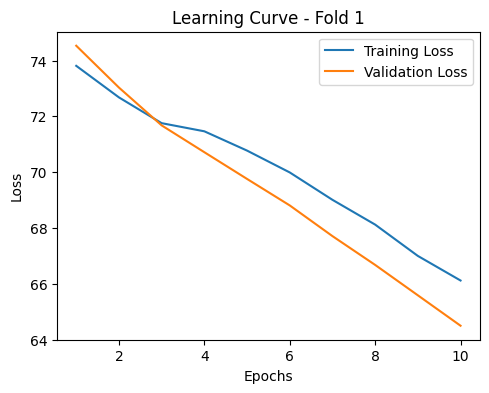

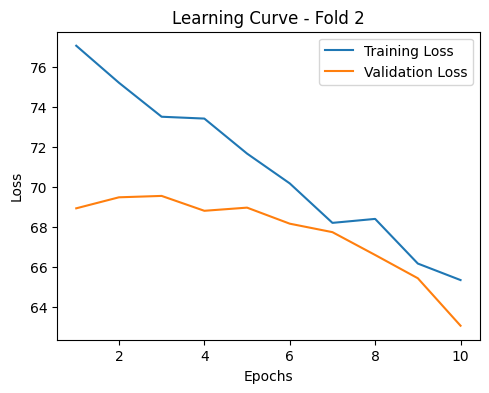

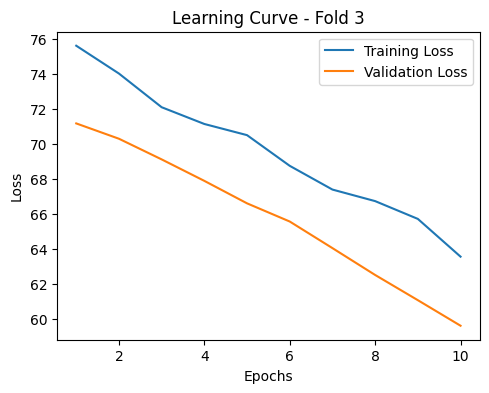

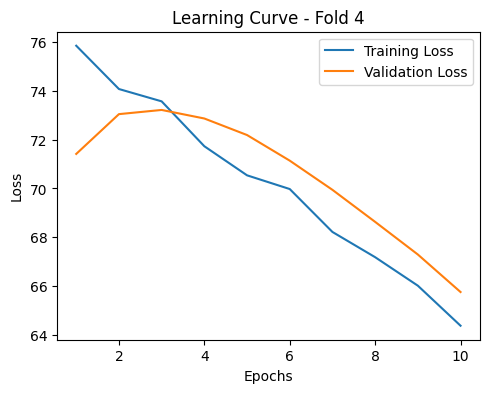

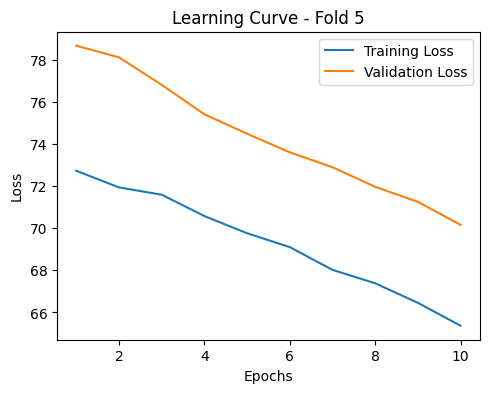

In [ ]:

y_train = y_train.astype('float32')  # Converting y_train to float32
mean_mae_for_fold = []  # list to store the mean of MAE for each fold
learning_curves = [] # list to store learning curves for each fold

# Implementing 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold_index, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train4, X_test4 = X_train[train_index], X_train[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]

    model = build_model()
    model.compile(optimizer='adam', loss=custom_mse_loss, metrics=['mse'])

    fold_maes = []
    training_loss, validation_loss = [], []

    for epoch in range(1000):
        history = model.fit(X_train4, Y_train, validation_data=(X_test4, Y_test), epochs=1)

        # Extracting training and validation loss
        training_loss.append(history.history['loss'][0])
        validation_loss.append(history.history['val_loss'][0])

        # Calculating MAE on the test set for this epoch
        test_output = model.predict(X_test4)
        mae = custom_mae_loss(Y_test, test_output)
        fold_maes.append(mae)

    mean_mae_for_fold.append(np.mean(fold_maes))

    # Plotting the learning curve for this fold
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 1001), training_loss, label='Training Loss')
    plt.plot(range(1, 1001), validation_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Learning Curve - Fold {fold_index + 1}')
    learning_curves.append(plt)


In [ ]:
print('***********************MSE*************************')

# Print the table with one row containing the mean MAE for each fold
print("Table of Mean Test MAEs for Each Fold:")
table_with_labels = np.array(mean_mae_for_fold).reshape(1, -1)
headers = [f"Fold {fold_index + 1}" for fold_index in range(5)]
print(tabulate(table_with_labels, headers=headers))

***********************MSE*************************
Table of Mean Test MAEs for Each Fold:
  Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
--------  --------  --------  --------  --------
 3.84521   3.78958   3.68045    3.9546     3.829
